In [1]:
# Importing preprocessed dataset
import pandas as pd
df = pd.read_csv('cleaned_data_filtered.csv')

In [2]:
print(df.shape)

(231610, 8)


In [3]:
df.describe()

,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates,calories
count,231610.000000,231610.000000,231610.000000,231610.000000,231610.000000,231610.000000,231610.000000
mean,35.758033,82.000695,29.898981,34.475454,45.247541,15.301010,468.624464
std,63.946631,244.748418,115.626084,50.752417,89.271381,29.720792,681.550287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,9.000000,5.000000,7.000000,7.000000,4.000000,174.300000
50%,20.000000,25.000000,14.000000,18.000000,23.000000,9.000000,313.400000
75%,41.000000,68.000000,33.000000,51.000000,52.000000,16.000000,519.600000
max,2713.000000,12914.000000,14664.000000,3351.000000,4610.000000,1098.000000,17287.500000


In [4]:
df.head()

,name,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates,calories
0,arriba baked winter squash mexican style,0,13,0,2,0,4,51.5
1,a bit different breakfast pizza,18,0,17,22,35,1,173.4
2,all in the kitchen chili,22,32,48,39,27,5,269.8
3,alouette potatoes,17,10,2,14,8,20,368.1
4,amish tomato ketchup for canning,1,337,23,3,0,28,352.9


In [5]:
df = df.drop(columns=['name'])

In [6]:
df.head()

,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates,calories
0,0,13,0,2,0,4,51.5
1,18,0,17,22,35,1,173.4
2,22,32,48,39,27,5,269.8
3,17,10,2,14,8,20,368.1
4,1,337,23,3,0,28,352.9


In [7]:
#Separating features X from labels y
y = df['calories'].to_numpy()
X = df.drop(columns=['calories']).to_numpy()

In [8]:
#Divide dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [9]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)
LR.score(X_test, y_test) #testing accuracy

0.9926590621054197

In [10]:
LR.score(X_train, y_train) #training accuracy

0.9938870610362

In [11]:
print(y)

[ 51.5 173.4 269.8 ...  59.2 188.  174.9]


In [12]:
print(X)

[[ 0 13  0  2  0  4]
 [18  0 17 22 35  1]
 [22 32 48 39 27  5]
 ...
 [ 6  2  3  6  5  0]
 [11 57 11  7 21  9]
 [14 33  4  4 11  6]]


In [13]:
import numpy as np

# Creating a sample input
sample_input = np.array([22, 32, 48, 39, 27, 5])

# Reshaping (1, num_features)
sample_input = sample_input.reshape(1, -1)

# Making prediction
predicted_value = LR.predict(sample_input)

print("Predicted Calories:", predicted_value)

Predicted Calories: [280.2269513]


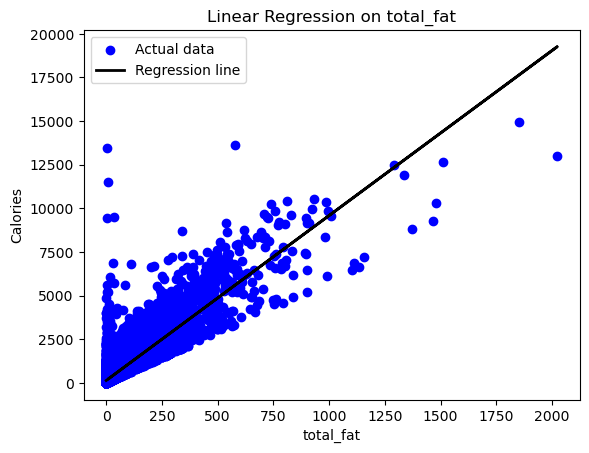

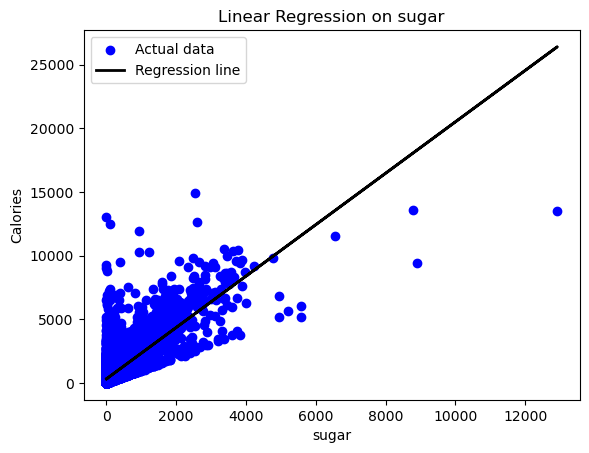

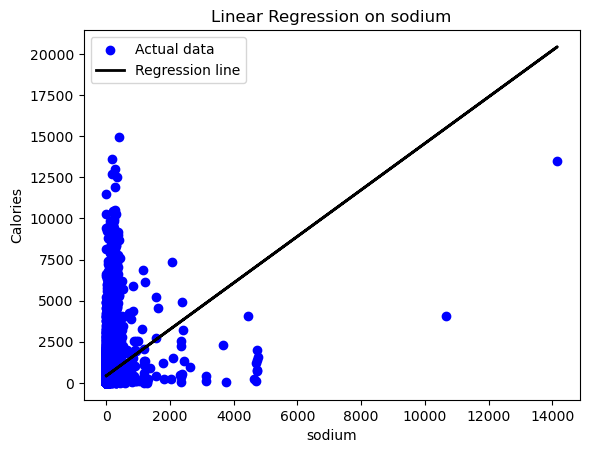

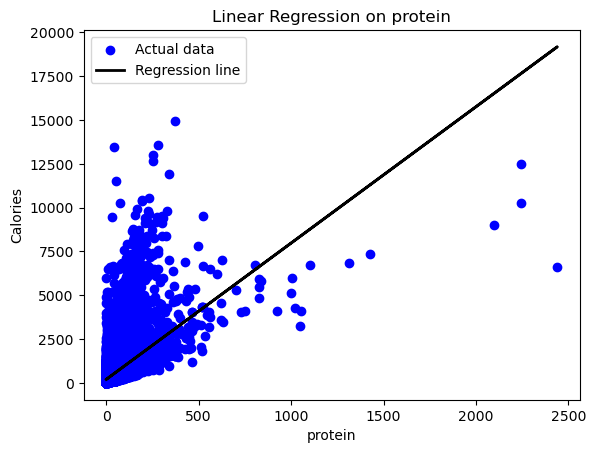

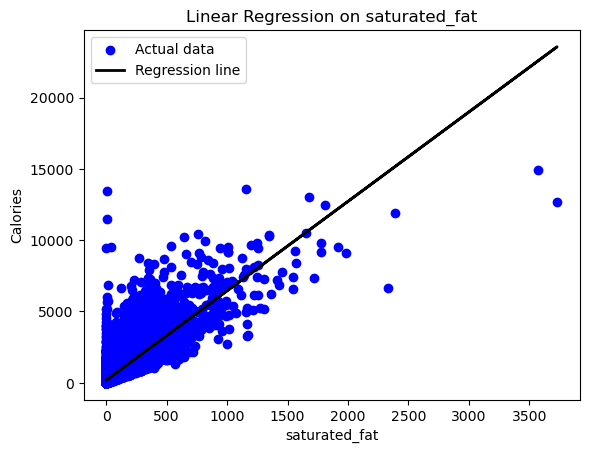

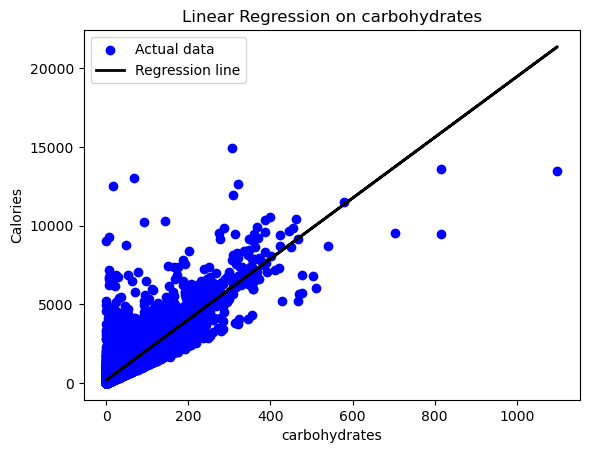

In [14]:
# Plotting linear regression between each nutrtional value and the calories
from matplotlib import pyplot as plt
for i in range(6):
    feature_index = i
    
    # Extract the corresponding feature values
    X_train_feature = X_train[:, feature_index].reshape(-1, 1)
    X_test_feature = X_test[:, feature_index].reshape(-1, 1)
    
    # Fitting model for visualization using only one feature
    LR_single = LinearRegression()
    LR_single.fit(X_train_feature, y_train)
    
    y_pred = LR_single.predict(X_test_feature)
    
    # Plotting the actual data points
    plt.scatter(X_test_feature, y_test, color='b', label="Actual data")
    
    # Plotting the regression line
    plt.plot(X_test_feature, y_pred, color='k', linewidth=2, label="Regression line")

    # Getting the feature names from the data
    feature_names = df.drop(columns=['calories']).columns
    # Choosing a feature index for visualization
    feature_name = feature_names[feature_index]
    
    plt.xlabel(feature_name)
    plt.ylabel("Calories")
    plt.legend()
    plt.title(f"Linear Regression on {feature_name}")
    
    plt.show()